In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

#plot library
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from helpers import *
from cross_val import *
from preprocessing import *
from plot import *

from run import *

# Data Exploration

In [8]:
DEBUG = False 

In [9]:
PATH_TRAIN= '../data/train.csv'
PATH_TEST = '../data/test.csv'
y, tX, ids = load_csv_data(PATH_TRAIN, sub_sample=DEBUG)
y_test, tX_test, ids_test = load_csv_data(PATH_TEST, sub_sample=DEBUG)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

In [10]:
print("y train size : ", y.shape[0] )
print("train tX shape : ", tX.shape[0])
print( "y test size : ", y_test.shape[0])
print("test tX shape : ", tX_test.shape)

y train size :  250000
train tX shape :  250000
y test size :  568238
test tX shape :  (568238, 30)


In [11]:
print("# Higgs signal particules (s): ", len(y[y==1]), '/',round(len(y[y==1])*100/len(y),0),'%')
print("# background particules (b): ", len(y[y==-1]), '/',round(len(y[y==-1])*100/len(y),0),'%')

# Higgs signal particules (s):  85667 / 34.0 %
# background particules (b):  164333 / 66.0 %


In [12]:
print("There are" , len(tX[tX==-999.0]),'(',
      np.round(len(tX[tX==-999.0])*100./(len(tX)*30)),  "%), missing values")

There are 1580052 ( 21.0 %), missing values


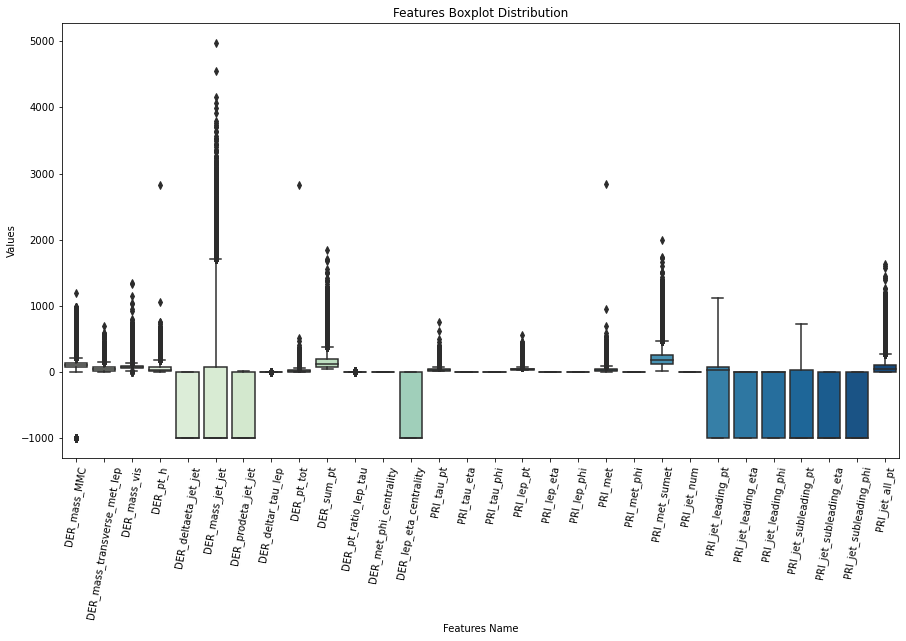

In [13]:
palette = sns.color_palette("GnBu", n_colors=30)


figure = plt.figure(figsize=(15,8))
ax = sns.boxplot(data = tX, palette = palette)
ax.set_xticklabels(features_name, rotation = 80)
plt.title("Features Boxplot Distribution")
plt.xlabel('Features Name')
plt.ylabel('Values')
plt.show()

*need to standarize the features + remove outliers*

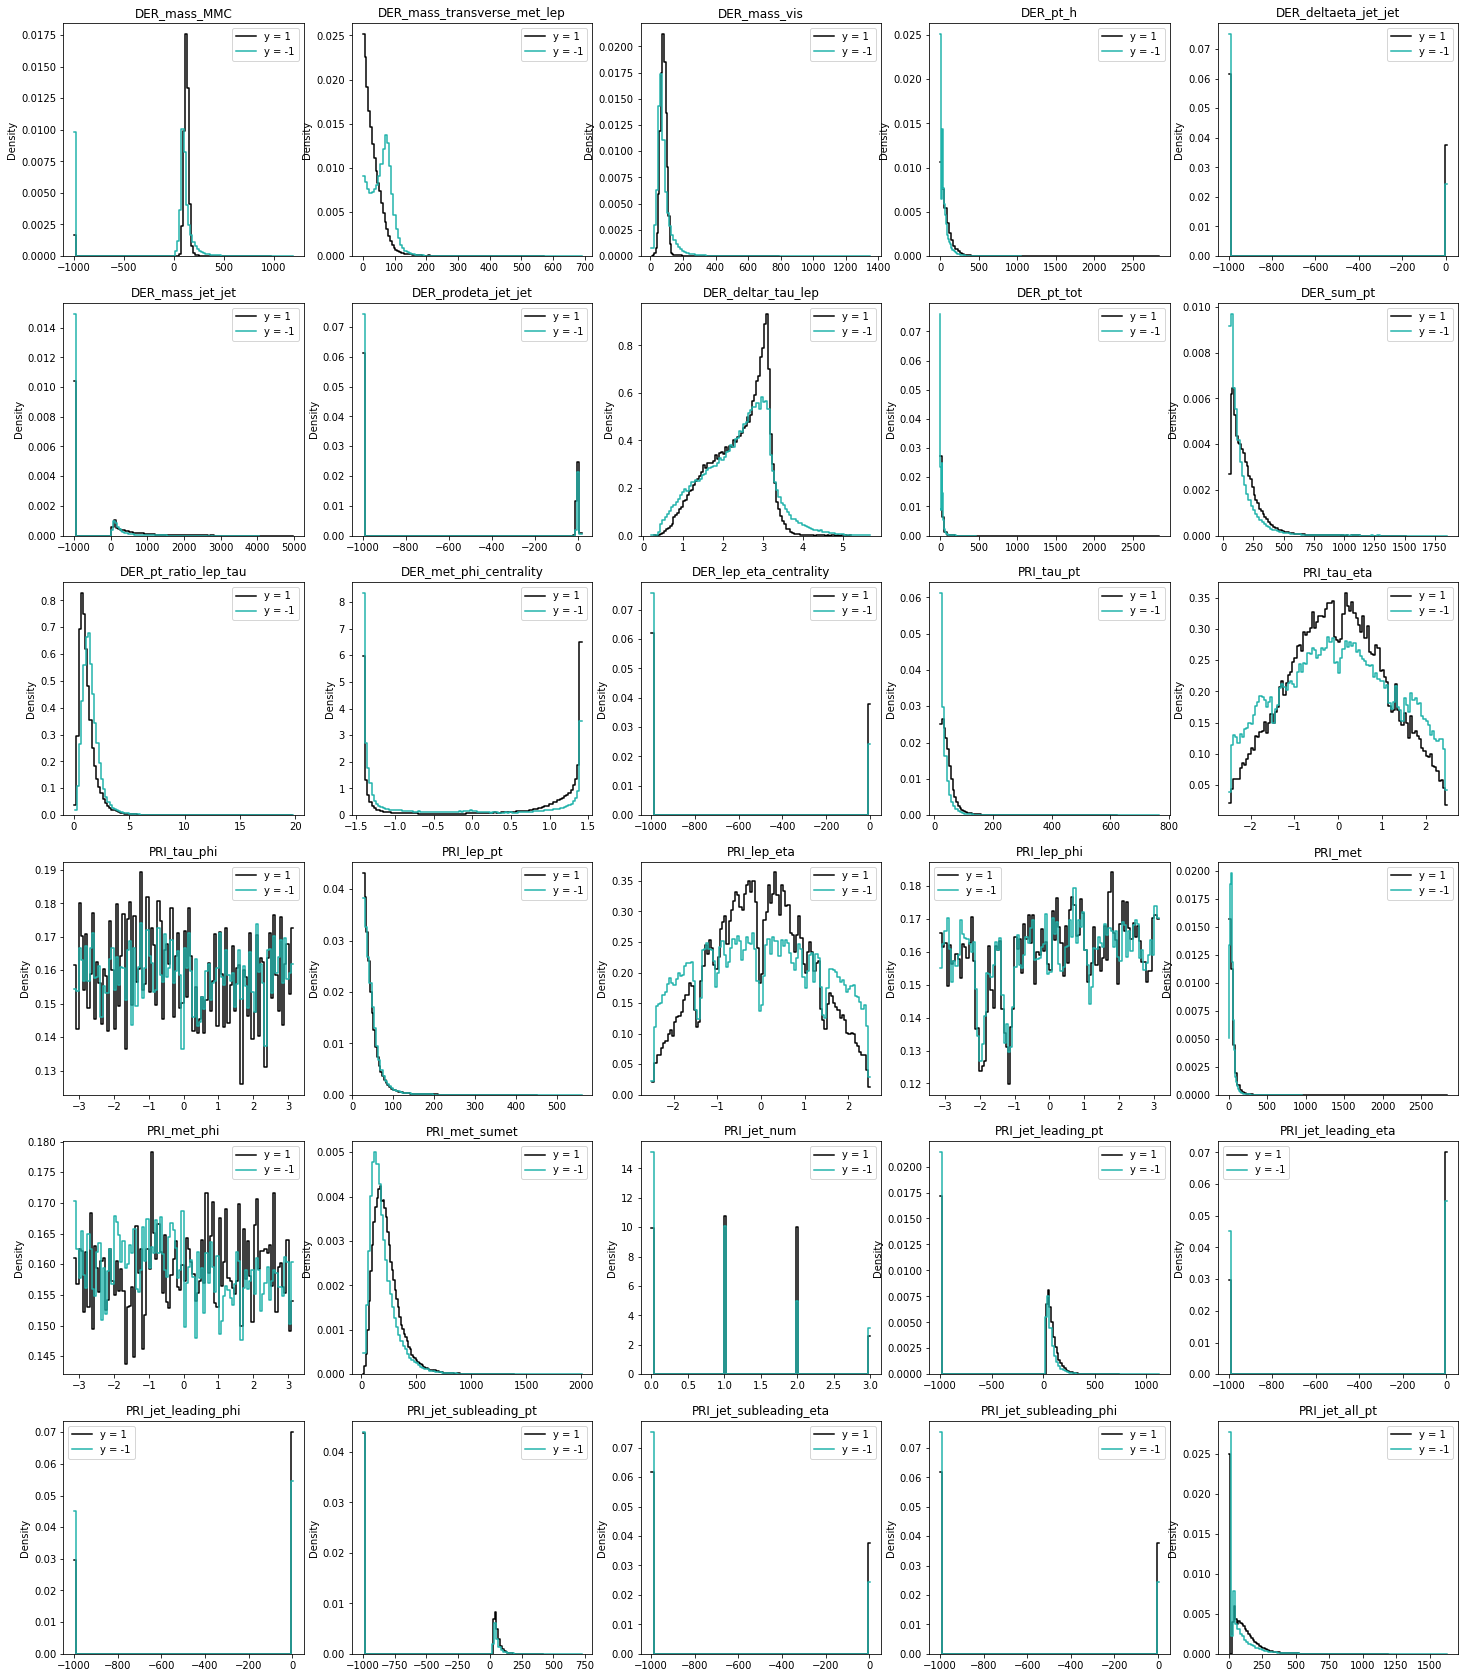

In [14]:
fig= plt.figure(figsize=(25,30))

for idx in range(tX.shape[1]): 
    ax=plt.subplot(6,5,idx+1)
    
    #density plot of each feature depending on the y response
    sns.histplot(data=tX[y==1, idx], ax=ax, element="step", 
                 fill=False, color = 'black', stat = 'density', bins = 100)
    sns.histplot(data=tX[y==-1, idx], ax=ax, element="step",
                 fill=False, color = 'lightseagreen', stat = 'density', bins = 100)
    
    #plot parameters
    ax.set_title(features_name[idx])
    ax.legend(["y = 1", "y = -1"])

*NB : test without PRI_tau_phi, PRI_met_phi, PRI_lep_phi*

# Data Preprocessing

In [78]:
preprocessed_X,preprocessed_X_test, preprocessed_y,  = preprocess_data(tX, tX_test, y)

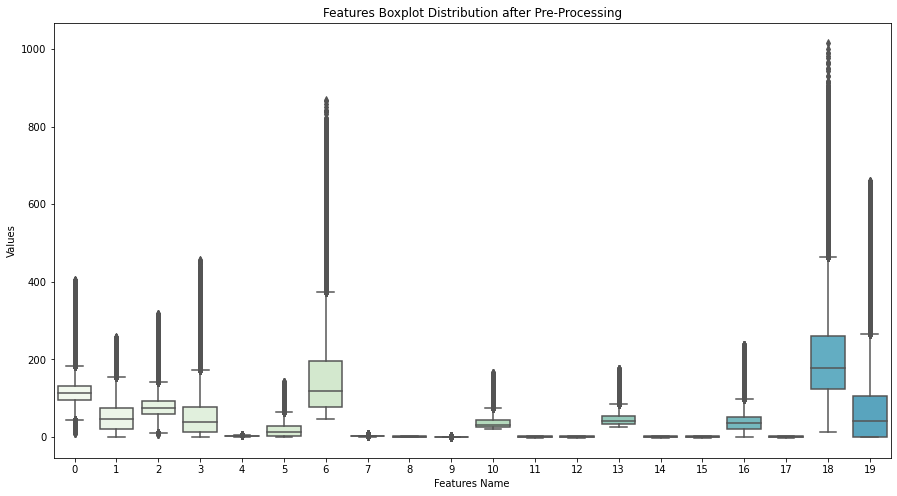

In [16]:
palette = sns.color_palette("GnBu", n_colors=30)
figure = plt.figure(figsize=(15,8))
ax = sns.boxplot(data = preprocessed_X, palette = palette)
#ax.set_xticklabels(features_name, rotation = 80)
plt.title("Features Boxplot Distribution after Pre-Processing")
plt.xlabel('Features Name')
plt.ylabel('Values')
plt.show()

# Method implementation

In [64]:
seed = 2
k_fold = 5

## Least square with GD

### Parameters in order to tune
- gamma (learning rate)
- D (degree of polynomial thingy)

Tested parameters
 [{'gamma': 0.1, 'degree': 1, 'max_iters': 50}, {'gamma': 0.1, 'degree': 2, 'max_iters': 50}, {'gamma': 0.1, 'degree': 3, 'max_iters': 50}, {'gamma': 0.1, 'degree': 4, 'max_iters': 50}, {'gamma': 0.1, 'degree': 5, 'max_iters': 50}, {'gamma': 0.1, 'degree': 6, 'max_iters': 50}, {'gamma': 0.1, 'degree': 7, 'max_iters': 50}, {'gamma': 0.1, 'degree': 8, 'max_iters': 50}, {'gamma': 0.1, 'degree': 9, 'max_iters': 50}]
Best parameters
 {'gamma': 0.1, 'degree': 1, 'max_iters': 50}


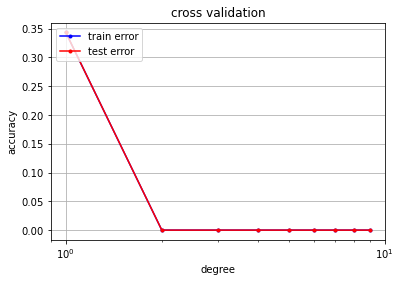

In [79]:
method = least_squares_GD
degree=np.arange(1,10)

gamma = 0.1
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'gamma': 1e-07, 'degree': 1, 'max_iters': 50}, {'gamma': 1e-06, 'degree': 1, 'max_iters': 50}, {'gamma': 1e-05, 'degree': 1, 'max_iters': 50}, {'gamma': 0.0001, 'degree': 1, 'max_iters': 50}, {'gamma': 0.001, 'degree': 1, 'max_iters': 50}, {'gamma': 0.01, 'degree': 1, 'max_iters': 50}, {'gamma': 0.1, 'degree': 1, 'max_iters': 50}, {'gamma': 1.0, 'degree': 1, 'max_iters': 50}]
Best parameters
 {'gamma': 1e-05, 'degree': 1, 'max_iters': 50}
Test Accuracy for the best params :  0.4838329938900204


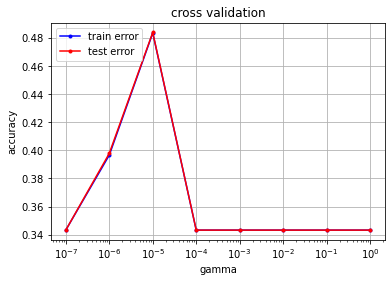

In [80]:
method = least_squares_GD
degree = parameters[idx_best]['degree']
gammas= np.logspace(-7, 0, 8)
max_iters = 50
parameters = []
for g in gammas:
    parameters.append({'gamma':g, 'degree':degree, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)




cross_validation_visualization(gammas, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters\n', parameters[idx_best])

accuracy_LGD = acc_te_gam[idx_best]
print('Test Accuracy for the best params : ' , accuracy_LGD)

In [52]:
from run import *

In [67]:
del parameters[idx_best]['degree']

In [68]:
run(least_squares_GD, degree, parameters[idx_best])

{'gamma': 1e-06, 'max_iters': 50}
train accuracy  0.6004439329168036


## Least square with SGD

### Parameters for this method
- degree
- gamma (lr)
- max_iters

In [81]:
method = least_squares_SGD
degree=np.arange(1,10)
gamma = 0.1
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'gamma': 0.1, 'degree': 1, 'max_iters': 50}, {'gamma': 0.1, 'degree': 2, 'max_iters': 50}, {'gamma': 0.1, 'degree': 3, 'max_iters': 50}, {'gamma': 0.1, 'degree': 4, 'max_iters': 50}, {'gamma': 0.1, 'degree': 5, 'max_iters': 50}, {'gamma': 0.1, 'degree': 6, 'max_iters': 50}, {'gamma': 0.1, 'degree': 7, 'max_iters': 50}, {'gamma': 0.1, 'degree': 8, 'max_iters': 50}, {'gamma': 0.1, 'degree': 9, 'max_iters': 50}]


/Users/alicia/Documents/GitHub/ML/project/implementations.py:132: RuntimeWarning: invalid value encountered in subtract
  # compute a stochastic gradient and loss


KeyboardInterrupt: 

In [ ]:
method = least_squares_SGD
degree = parameters[idx_best]['degree']
gammas= np.logspace(-7, 0, 8)
max_iters = 50
parameters = []
for g in gammas:
    parameters.append({'gamma':g, 'degree':degree, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters\n', parameters[idx_best])

accuracy_LSGD = acc_te_gam[idx_best]
print('Test Accuracy for the best params : ' , accuracy_LSGD)

In [ ]:
run(least_squares_SGD, degree, parameters[idx_best])

## Least square 

### Parameters to tune for this method
- degree
  

Not done yet. Singular matrix error. Flemme.

In [90]:
method = least_squares
degree = np.arange(1,10)
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'degree':d})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_deg, acc_te_deg, 'gamma')
print('Best parameters\n', parameters[idx_best])

accuracy_LS = acc_te_deg[idx_best]
print('Test Accuracy for the best params : ' , accuracy_LS)

Tested parameters
 [{'degree': 1}, {'degree': 2}, {'degree': 3}, {'degree': 4}, {'degree': 5}, {'degree': 6}, {'degree': 7}, {'degree': 8}, {'degree': 9}]


KeyboardInterrupt: 

In [89]:
run(least_squares, degree, parameters[idx_best])

TypeError: only integer scalar arrays can be converted to a scalar index

## Ride Regression 

### Parameters for this method
- degree
- lambda_

In [ ]:
method = ridge_regression
degree=np.arange(1,10)
lambda_ = 0.1
parameters = []
for d in degree:
    parameters.append({'lambda_':lambda_, 'degree':d})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

In [ ]:
method = ridge_regression
degree = parameters[idx_best]['degree']
lambdas_ = np.logspace(-7, 0, 8)
parameters = []
for l in lambdas_:
    parameters.append({'lambda_':l, 'degree':degree})
print('Tested parameters\n', parameters)
acc_tr_lamb, acc_te_lamb, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(lambdas_, acc_tr_lamb, acc_te_lamb, 'gamma')
print('Best parameters\n', parameters[idx_best])

accuracy_R = acc_te_lamb[idx_best]
print('Test Accuracy for the best params : ' , accuracy_R)

In [71]:
del parameters[idx_best]['degree']

In [72]:
run(ridge_regression, degree, parameters[idx_best])

{'lambda_': 1e-07}
train accuracy  0.8145634659651431


## Logistic

### Parameters for this method
- initinal_w (set to 0 for simplicity)
- max_iters
- gamma
- degree

Tested parameters
 [{'gamma': 0.01, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 2, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 3, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 4, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 5, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 6, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 7, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 8, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 9, 'max_iters': 50, 'initial_w': None}]


/Users/alicia/Documents/GitHub/ML/project/implementations.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
/Users/alicia/Documents/GitHub/ML/project/implementations.py:64: RuntimeWarning: divide by zero encountered in log
  loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))


Best parameters
 {'gamma': 0.01, 'degree': 2, 'max_iters': 50, 'initial_w': None}


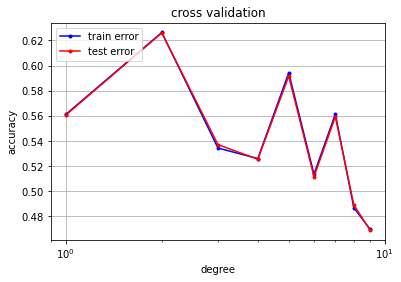

In [86]:
method = logistic_regression
degree = np.arange(1,10)
gamma = 0.01 # note lower gamma here. Otherwise no convergence.
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters, 'initial_w':None})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

[autoreload of implementations failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/alicia/Documents/GitHub/ML/project/implementations.py", line 66
    eta = tx@w
IndentationError: unexpected indent
]
/Users/alicia/Documents/GitHu

Tested parameters
 [{'gamma': 1e-07, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 1e-06, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 1e-05, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.0001, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.001, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.1, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 1.0, 'degree': 1, 'max_iters': 50, 'initial_w': None}]
Best parameters
 {'gamma': 1e-05, 'degree': 1, 'max_iters': 50, 'initial_w': None}
Test Accuracy for the best params :  0.650765784114053


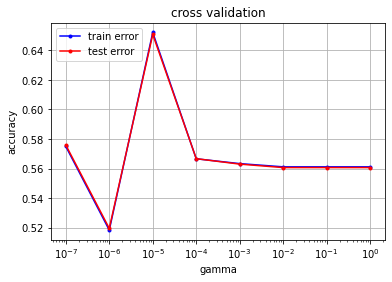

In [87]:
method = logistic_regression
degree = 1
gammas= np.logspace(-7, 0, 8)
max_iters = 50
parameters = []
for g in gammas:
    parameters.append({'gamma':g, 'degree':degree, 'max_iters':max_iters, 'initial_w':None})
print('Tested parameters\n', parameters)
acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters\n', parameters[idx_best])

accuracy_Log = acc_te_gam[idx_best]
print('Test Accuracy for the best params : ' , accuracy_Log)

In [ ]:
run(least_squares, degree, parameters[idx_best], 'Logistic')

## Regularized logistic

In [ ]:
Methods = ['Least square GD', 'Least square SDG', 'Least square', 'Ridge Regression', 'Logistic']
Accuracy = [accuracy_LGD,accuracy_LSGD, accuracy_LS, accuracy_R, accuracy_Log]